# Elementos de Inferencia

### Ejercicio 2

Una máquina empaca bolsas de almendras, cuyo contenido es aleatorio y distribuido normalmente con media $250$ grs. y desviación estándar de $4$ grs. El departamento de control de calidad tomó una muestra aleatoria de $16$ bolsas con una cantidad media de $247$ grs. Supóngase que se desean contrastar las hipótesis:

$$H_0 : \mu = 250$$

$$H_a : \mu \neq 250$$

Para un nivel de significancia de $.05$ y determinar si se debe detener el proceso para ajustar la máquina al rechazar $H_0$. Realícense gráficas donde se visualice la región de rechazo definida para el nivel de significancia dado, el valor observado de la estadística de prueba y valor(es) crítico(s). ¿Hay que hacer ajuste a la máquina y detener el proceso? ¿la prueba anterior es de una o dos colas?.

El valor p se calcula como:

$$P(\mu  \neq \mu_{obs} | H_0 verdadera ) = P(\mu < \mu_{obs} | H_0 verdadera) + P( \mu > \mu_{obs} | H_0 verdadera)$$

Dado que contamos con la media y la desviación estándar podemos calcular la probabilidad con:

$$\frac{\bar{X} - \bar{x}}{S\text{ / }\sqrt{n}} \sim N(0,1)$$

Dónde $\bar{X}$ es la media observada de los $n$ valores de $X$, $\bar{x}$ es la media estadísitca de la prueba, $S$ es la desviación estándar y $n$ una muestra aleatoria de los posibles valores de $X$

**Nota:**     
Implementación basada en [Prueba para la media, Gutierrez Pulido. p.34](http://gc.initelabs.com/recursos/files/r161r/w19537w/analisis_y_diseno_experimentos.pdf)

In [1]:
mu <- 250
mu_obs <- 247
n <- 16
s <- 4
a <- 0.05
obs_test_statistic  <- (mu_obs-mu)/(s/sqrt(n))
obs_test_statistic

[1] -3

y el valor p entonces es:
$$P(\mu  \neq \mu_{obs} | H_0 verdadera )= P\left(\frac{247 - 250}{4\text{ / }\sqrt{16}} \right) = P(-3) \approx 0.002699 ,$$donde $Z \sim N(0,1)$.

In [48]:
p_value <- pnorm(obs_test_statistic)
2*p_value

[1] 0.002699796

In [3]:
library(ggplot2)
library(latex2exp)

In [4]:
alpha_divided_by_2 = a / 2
quantile_left = qnorm(alpha_divided_by_2)
quantile_right = -qnorm(alpha_divided_by_2)
print(quantile_left)
print(quantile_right)

[1] -1.959964
[1] 1.959964


In [23]:
set.seed(2000)
n <- 5000
df <- data.frame(x=rnorm(n))
y <- dnorm(df$x)
df$y <- y

In [31]:
gf <- ggplot(data = df, aes(x = x, y = y)) + geom_point(size=.2) + 
      theme(plot.title = element_text(size = 20, hjust = 0.5))

Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"
Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"


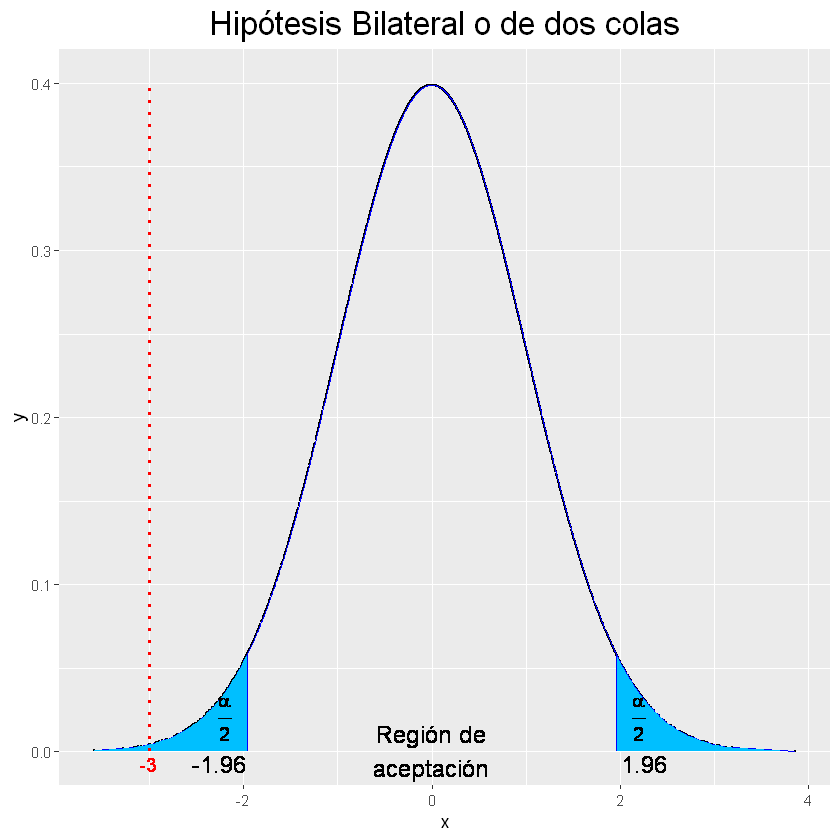

In [50]:
gf + geom_line(color="blue")+
geom_area(mapping = aes(x = ifelse(x < quantile_left, 
                                   x, quantile_left
                                   ),
                        y = ifelse(x < quantile_left, y, 0)), 
          fill = "deepskyblue1") + 
geom_area(mapping = aes(x = ifelse(x > quantile_right, 
                                   x, quantile_right
                                   ),
                        y = ifelse(x > quantile_right, y, 0)), 
          fill = "deepskyblue1") + 
geom_segment(aes(x = quantile_left, 
                 y = 0, 
                 xend = quantile_left, 
                 yend = dnorm(quantile_left)
                 ),
              colour = "blue"
             ) +
geom_segment(aes(x = quantile_right, 
                 y = 0, 
                 xend = quantile_right, 
                 yend = dnorm(quantile_right)
                 ),
              colour = "blue"
             ) +
geom_segment(aes(x = obs_test_statistic, 
                 y = 0, 
                 xend = obs_test_statistic, 
                 yend = 0.4
                 ),
              colour = "red",
              linetype = "dotted",
              size = 1
             ) +
geom_text(x = quantile_left -  3e-1, y = -7e-3, label = "-1.96", size = 5) + 
geom_text(x = quantile_right + 3e-1, y = -7e-3, label = "1.96", size = 5) + 
geom_text(x = -0.01, y = 0.001, label = "Región de\naceptación", size = 5) + 
geom_text(x = obs_test_statistic , y = -7e-3, label = "-3", colour="red", size = 4) + 
geom_text(x = -2.2,y = 2e-2,label = TeX("$\\frac{\\alpha}{2}$"), size = 4 ) +
geom_text(x = 2.2,y = 2e-2,label = TeX("$\\frac{\\alpha}{2}$"), size = 4 ) +
ggtitle("Hipótesis Bilateral o de dos colas")

### Conclusión

### Hipótesis bilateral o de dos colas

**Nota:**     
Tomado de [Gutierrez Pulido. p 32](http://gc.initelabs.com/recursos/files/r161r/w19537w/analisis_y_diseno_experimentos.pdf)

La región de rechazo está repartida de manera equitativa entre ambas colas de la distribución del estadístico de prueba.
Si las hipótesis están dadas por las relaciones: 

$$H_0 : \mu = 250$$
$$H_a : \mu \neq 250$$

Se rechaza $H_0$ si $P(Z) < – Z_{\alpha/2}$ o si $P(Z) > Z_{\alpha/2}$, o simplemente, si $|Z| > Z_{\alpha/2}$. En la gráfica esto equivale a que $Z$ caiga en el rango de las áreas sombreadas.

Por lo tanto, rehcazamos $H_0$ ya que $P(Z) < -Z_{\alpha/2}$     

Esto es consistente con que $Z$ se encuentra dentro de la región de significancia para $\frac{\alpha}{2} = 0.025$.    

Con esta información consideramos que **se debe detener el proceso y reajustar la máquina.**